# <center>Projet 6: Analysez les ventes d'une librairie avec Python<center>

<div>
<img src="logo-lapage.png" style = "width: 400px; height: 150px" title = "Lapage"/>
</div>

### <center>Réalisée par: Thi Tuong Le</center>
#### <center>Data Analyst</center>

## Sommaire (Part. 2)
1. [Librarie](#1.-Libraries)
2. [Dataset](#2.-Dataset)
3. [Indicateurs de vente: CA et nombre de ventes](#3.Indicateurs-de-vente:-CA-et-nombre-de-ventes)

    3.1. [Chiffre d'affaires (CA) et nombre de ventes global](#3.1.-Chiffre-d'affaires-(CA)-et-nombre-de-ventes-global)
    
    3.2. [Chiffre d'affaire et nombre de ventes par année](#3.2.-Chiffre-d'affaire-et-nombre-de-ventes-par-année)
    
    3.3. [Chiffre d'affaire et nombre de ventes mensuel](#3.3.-Chiffre-d'affaire-et-nombre-de-ventes-mensuel)
    
    3.4. [Chiffre d'affaire et nombre de ventes journalier](#3.4.-Chiffre-d'affaire-et-nombre-de-ventes-journalier)
    
    3.5. [CA par produits et par catégories](#3.5.-CA-par-produits-et-par-catégories)
    
    3.6. [Etude CA sur les clients](#3.6.-Etude-CA-sur-les-clients)
    
    3.7. [Etude CA sur les produits](#3.7.-Etude-CA-sur-les-produits)

## 1. Libraries

In [1]:
# Import tous les libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

## 2. Dataset

In [2]:
# Current working directory
import os
os.getcwd()

"/Users/lethituong/Desktop/Data Analyst/P6-Analysez les ventes d'une librairie avec R ou Python/Ventes d'une librairie"

In [3]:
# Import le dataframe
df = pd.read_csv("df.csv")

In [4]:
df.head()

,id_prod,date,session_id,client_id,sex,birth,price,categ,year,month,day,age,age_ranges
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986,4.18,0,2022,5,20,37,30-40
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,m,1988,15.99,1,2022,2,2,35,30-40
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,f,1968,7.99,0,2022,6,18,55,52-61
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,m,2000,69.99,2,2021,6,24,23,19-29
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,m,1980,4.99,0,2023,1,11,43,41-51


In [5]:
df.shape

(679332, 13)

## 3. Indicateurs de vente: CA et nombre de ventes

### 3.1. Chiffre d'affaires (CA) et nombre de ventes global

In [6]:
#On calcul le CA total
CA = np.round(df.price.sum(),2)
print("Le CA total est de", CA, "€")

Le CA total est de 11856080.12 €


In [7]:
# Nombre de vente en total
nbr_sales_total =  df["price"].count()
print("Le total de vente est de", nbr_sales_total)

Le total de vente est de 679332


### 3.2. Chiffre d'affaire et nombre de ventes par année

In [8]:
# Calcul du CA par année
np.round(df.groupby("year")["price"].sum(),2)

year
2021    4771752.24
2022    6109958.61
2023     974369.27
Name: price, dtype: float64

In [9]:
# Nombre de vente par année
nbr_sales_annee = df.groupby("year")["price"].count()
print("Le nombre de vente par année est de", nbr_sales_annee)

Le nombre de vente par année est de year
2021    278335
2022    346500
2023     54497
Name: price, dtype: int64


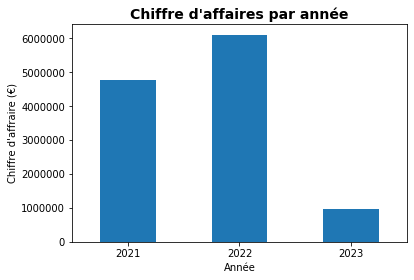

In [10]:
# Visualization les CA chaque année

df.groupby("year")["price"].sum().plot(kind = "bar")
plt.title("Chiffre d'affaires par année", fontsize = 14, fontweight="bold")
plt.xticks(rotation=0, ha="center")
plt.xlabel("Année")
plt.ylabel("Chiffre d'affraire (€)")
plt.savefig("CA par année.png", dpi=300)
plt.show()

<div class="alert alert-block alert-info"><b>En 2022, le plus chiffre d'affaires a été observé.

### 3.3. Chiffre d'affaire et nombre de ventes mensuel

In [11]:
# On calcul le CA et nbr de ventes mensuel
df_ca_mensuel = df[["year", "month", "session_id","price"]].groupby(["year", "month"]).agg(["sum","nunique"]).reset_index()
df_ca_mensuel["ca_month"] = df_ca_mensuel["price"]["sum"]
df_ca_mensuel["nbr_sales_month"] = df_ca_mensuel["session_id"]["nunique"]
df_ca_mensuel.drop(["price", "session_id"], axis="columns", inplace=True)
df_ca_mensuel

/Users/lethituong/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:3946: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


,year,month,ca_month,nbr_sales_month
,,,,
0,2021,3,482536.37,14203
1,2021,4,476258.26,13972
2,2021,5,493028.59,14169
3,2021,6,484163.04,13839
4,2021,7,482877.96,13573
5,2021,8,482380.55,13593
6,2021,9,507368.36,14850
7,2021,10,320873.22,11553
8,2021,11,516274.13,14608


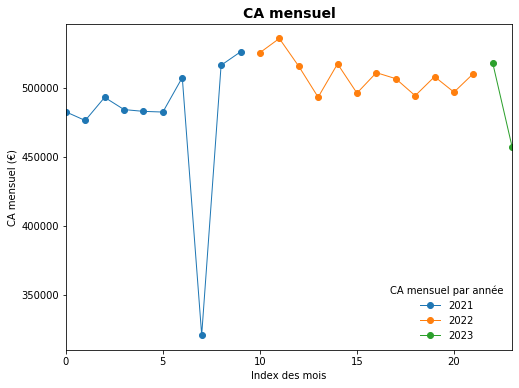

In [12]:
df_ca_mensuel.groupby("year")["ca_month"].plot(figsize=(8,6),marker="o", linewidth = 1, markersize=6)
plt.title("CA mensuel", fontsize = 14, fontweight="bold")
plt.xlabel("Index des mois")
plt.ylabel("CA mensuel (€)")
plt.legend(frameon=False, title="CA mensuel par année", loc="lower right")
plt.savefig("CA mensuel.png", dpi=300)
plt.show()

In [13]:
# Calcul le CA mensuel moyen
print("CA mensuel moyen est de", round(df_ca_mensuel.ca_month.mean(),2),"euros")

CA mensuel moyen est de 494003.34 euros


In [14]:
# Calcul le nombre de ventes mensuelles moyen
print("le nombre de ventes mensuelles moyen est de",round(df_ca_mensuel.nbr_sales_month.mean(),2), "livres")

le nombre de ventes mensuelles moyen est de 14265.25 livres


<div class="alert alert-block alert-info"><b>Synthèse de l'analyse du CA et du nombre de ventes au global:
    
- Le chiffre d'affaire généré depuis du 01/03/2021 au 28/02/2023 est de 11856080.12 € pour un total de 679332 ventes
- CA mensuel et nombre de ventes moyens : 494003.34 € pour 14265.25 livres
- Le mois d’octobre 2021 est marqué par une chute significative du CA généré --> Besoin de faire l'observation?

### 3.4. Chiffre d'affaire et nombre de ventes journalier

In [15]:
# On calcul le CA et nbr de ventes journalier
df_ca_j = df[["year", "month", "day", "session_id","price"]].groupby(["year", "month", "day"]).agg(["sum","nunique"]).reset_index()
df_ca_j["ca_day"] = df_ca_j["price"]["sum"]
df_ca_j["nbr_sales_day"] = df_ca_j["session_id"]["nunique"]
df_ca_j.drop(["price", "session_id"], axis="columns", inplace=True)
df_ca_j

/Users/lethituong/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:3946: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


,year,month,day,ca_day,nbr_sales_day
,,,,,
0,2021,3,1,16575.86,487
1,2021,3,2,15497.09,471
2,2021,3,3,15198.69,437
3,2021,3,4,15196.07,449
4,2021,3,5,17471.37,496
...,...,...,...,...,...
725,2023,2,24,15207.89,460
726,2023,2,25,15761.25,463
727,2023,2,26,16304.72,487


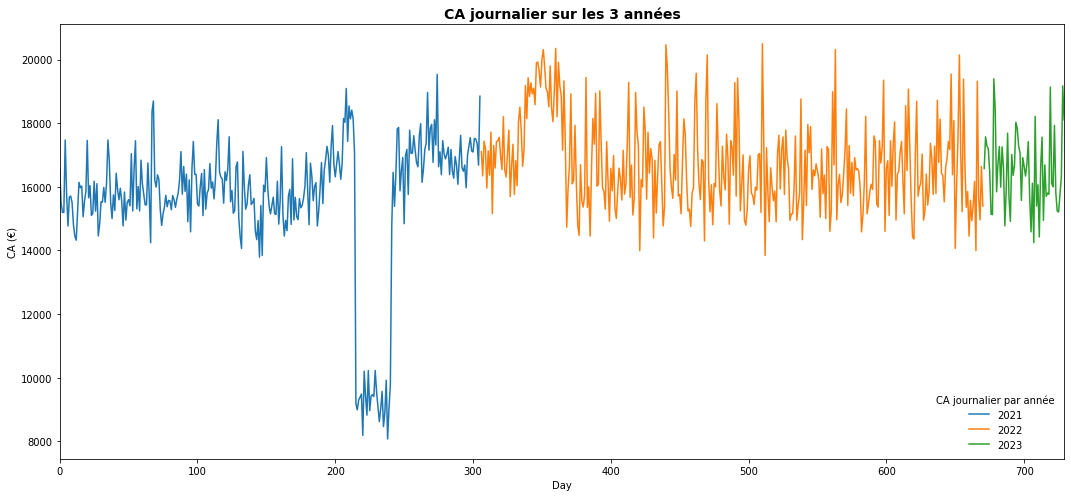

In [16]:
df_ca_j.groupby("year")["ca_day"].plot(figsize=(18,8), kind="line")
plt.title('CA journalier sur les 3 années', fontsize = 14, fontweight="bold")
plt.xlabel("Day")
plt.ylabel("CA (€)")
plt.legend(frameon=False, title="CA journalier par année", loc="lower right")
plt.savefig("CA journalier sur les 3 année.png", dpi=300)
plt.show()

### 3.5. CA par produits et par catégories

In [17]:
# CA par catégorie par an
df_finale_CA_cat_par_an= df.groupby(["year","categ"]).agg({"price":"sum"})

In [18]:
print(df_finale_CA_cat_par_an)

                   price
year categ              
2021 0      1.883946e+06
     1      1.777996e+06
     2      1.109810e+06
2022 0      2.194247e+06
     1      2.485275e+06
     2      1.430436e+06
2023 0      3.438890e+05
     1      3.904516e+05
     2      2.400286e+05


In [19]:
# CA par catégorie par mois
df_finale_CA_cat_par_mois = df.groupby(["month","categ"]).agg({"price":"sum"})

In [20]:
print(df_finale_CA_cat_par_mois)

                 price
month categ           
1     0      345621.25
      1      466372.33
      2      231013.64
2     0      345845.85
      1      393467.88
      2      253129.05
3     0      385306.91
      1      393459.43
      2      219343.60
4     0      380517.64
      1      351402.32
      2      237486.20
5     0      391314.42
      1      371426.03
      2      247590.98
6     0      352026.97
      1      391074.10
      2      237152.57
7     0      332018.03
      1      382492.99
      2      279277.74
8     0      345291.26
      1      374351.47
      2      269290.21
9     0      429906.59
      1      385993.32
      2      185678.74
10    0      386860.88
      1      233371.98
      2      208664.53
11    0      340727.35
      1      453338.38
      2      218990.38
12    0      386645.26
      1      456972.46
      2      192657.38


In [21]:
#CA_cat = pd.pivot(df[['month','categ','price']], index = ['month'], values=['price'], columns ='categ', aggfunc = 'sum')
#CA_cat.head()
# Créer une table pivot pour pouvoir représenter le CA par catégorie de produit par année et mois
df_categ = pd.pivot_table(df, index = ["year","month"], columns = "categ", values = "price",aggfunc={"price":"sum"})

In [22]:
df_categ.sum()

categ
0    4422082.41
1    4653722.69
2    2780275.02
dtype: float64

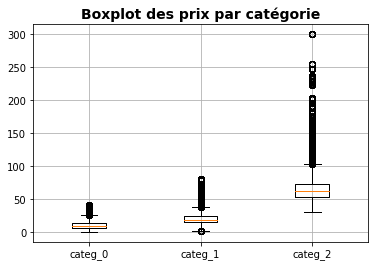

In [23]:
# Visualisation les produits avec les prix par les categories pour vérifier si les produits de ces catégories ont la même échelle de prix.
categ_0 = df[df["categ"]==0]["price"]
categ_1 = df[df["categ"]==1]["price"]
categ_2 = df[df["categ"]==2]["price"]
columns = [categ_0,categ_1,categ_2]
fig, ax = plt.subplots()
ax.boxplot(columns)
plt.xticks([1, 2, 3], ["categ_0", "categ_1", "categ_2"])
plt.title("Boxplot des prix par catégorie", fontsize = 14, fontweight = "bold")
plt.grid()
plt.show()

#Sauvegarde en PNG
fig.savefig("graph_boxplot des prix par categ.png")
plt.close(fig)

In [24]:
# On affiche les statistique descriptives
df.groupby("categ").agg({"price": ["min","max","mean","std","median"]})

price                                     
         min     max       mean        std median
categ                                            
0       0.62   40.99  10.638189   4.932216   9.99
1       2.00   80.99  20.485730   7.584894  19.08
2      30.99  300.00  76.207412  39.749015  62.83

In [25]:
# On affiche la liste de valeurs uniques de la colonne price
categ_0_prix = sorted(df.loc[df["categ"]==0].price.unique());
categ_1_prix = sorted(df.loc[df["categ"]==1].price.unique());
categ_2_prix = sorted(df.loc[df["categ"]==2].price.unique());

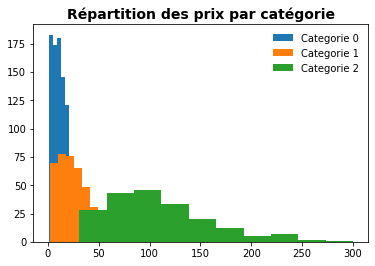

In [26]:
# Visualization 
fig, ax = plt.subplots()

ax.hist(categ_0_prix)
ax.hist(categ_1_prix)
ax.hist(categ_2_prix)

plt.legend(["Categorie 0","Categorie 1","Categorie 2"], frameon = False)
plt.title("Répartition des prix par catégorie", fontsize = 14, fontweight="bold")
plt.show()

#Sauvegarde en PNG
fig.savefig("graph_repartition des prix par categ.png")
plt.close(fig)

**Il s'agit de 3 catégories de produits de gammes différentes. La catégorie 2 est la plus haute gamme et la catégorie 0 est la plus faible**

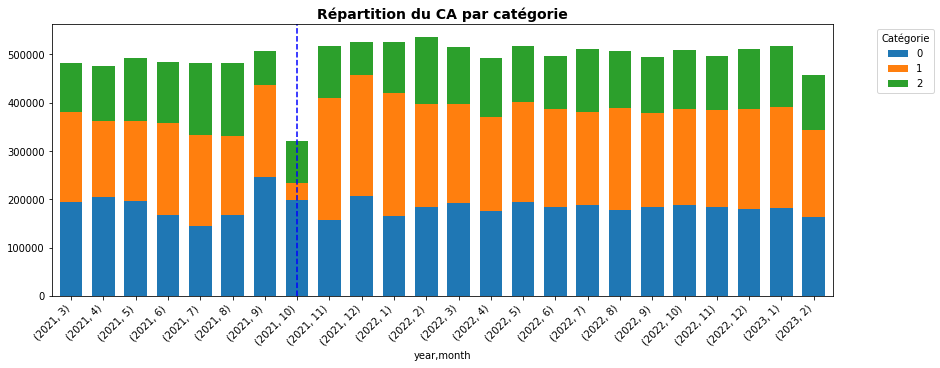

In [27]:
# Visualization le CA par les catégories
df_categ.plot(kind="bar",stacked = True,figsize=(14,5),width = 0.7)
plt.title("Répartition du CA par catégorie", fontsize = 14, fontweight = "bold")
plt.axvline(7,color="blue",linestyle="--")
plt.xticks(rotation = 45,ha="right")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", title = "Catégorie")
plt.show()

#Sauvegarde en PNG
fig.savefig("graph_repartition du CA par categ.png")
plt.close(fig)

**Le problème de CA en octobre 2021 à cause de CA de categ 1**

### 3.6. Etude CA sur les clients

In [28]:
# Je compte le nombre de clients uniques
df.client_id.value_counts().shape

(8600,)

In [29]:
# Je regroupe mes données par client_id et j'affiche le montant de leurs achats.
df_client = df.groupby('client_id')[['price']].sum();
df_client.head()

,price
client_id,
c_1,558.18
c_10,1353.60
c_100,254.85
c_1000,2261.89
c_1001,1812.86


In [30]:
# Trier les données de la colonne price par ordre croissant
df_client.sort_values('price', ascending = False)

,price
client_id,
c_1609,324033.35
c_4958,289760.34
c_6714,153662.76
c_3454,113669.85
c_3263,5276.87
...,...
c_4648,11.20
c_240,11.06
c_8114,9.98


**On remarque que les 4 clients (client_id=c_1609, c_4958, c_6714, et c_3454) ont dépensé beaucoup plus que les autres clients.**

In [31]:
# On trie les 4 et mettre dans nouvelle dataframe
df_4_clients = df.loc[(df["client_id"]=="c_1609")| (df["client_id"]=="c_4958")| (df["client_id"]=="c_6714") | (df["client_id"]=="c_3454"),:]

In [32]:
# On calcule du CA généré par ces 4 clients 
ca_4_clients = df_4_clients.price.sum()
print(ca_4_clients)

881126.3


In [33]:
# La proportion
prop_ca_4_clients = df_4_clients.price.sum() /df.price.sum()*100;
print(prop_ca_4_clients)

7.431851767884311


In [34]:
# ca par catégorie les 4 clients
df_4_clients_categ = pd.pivot_table(df_4_clients, index = ["year","month"], columns = "categ", values = "price",aggfunc={"price":"sum"});

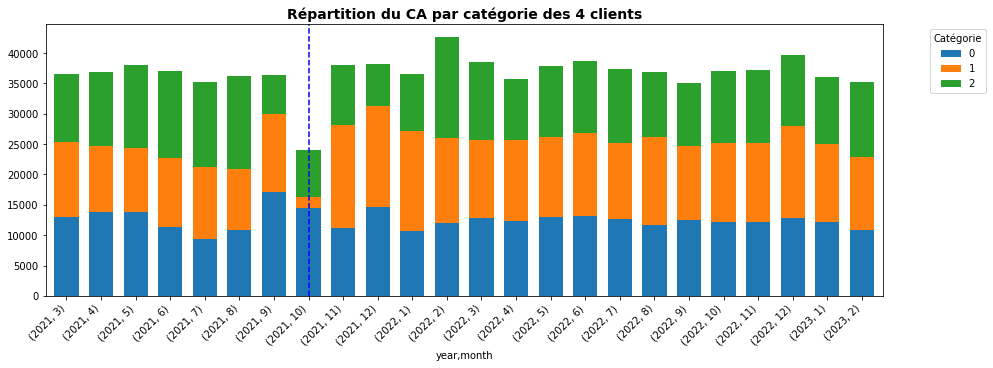

In [35]:
# Visualization les 4 clients par catégorie
df_4_clients_categ.plot(kind="bar",stacked = True,figsize=(15,5),width = 0.7)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc="upper left", title = "Catégorie")
plt.title("Répartition du CA par catégorie des 4 clients", fontsize=14, fontweight="bold")
plt.axvline(7,color="blue",linestyle="--")
plt.xticks(rotation = 45,ha="right")
plt.show()

#Sauvegarde en PNG
fig.savefig("graph_repartition du CA par categ des 4 clients.png")
plt.close(fig)

**On fait un zoom sur les 4 clients.**

#### 3.6.1. Création d'une courbe de Lorenz par des clients

In [36]:
cum = df_client.cumsum()

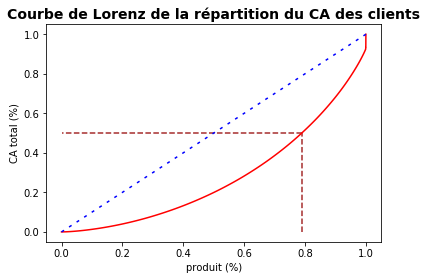

In [37]:
dep = df_client["price"]
n = len(cum)
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
# La courbe de Lorenz commence à 0
lorenz = np.append([0],lorenz) 

# Calcul de l'intersection
medial = lorenz[(lorenz < 0.5)].size / lorenz.size 

plt.plot(np.linspace(0,1,len(lorenz)), lorenz, drawstyle="steps-post", color="red", label="Lorenz")
plt.plot(np.linspace(0,1,len(lorenz)), np.linspace(0,1,len(lorenz)), dashes=[2,4], color="blue")

plt.vlines(medial, ymin=0, ymax=.5, color="brown", linestyle="--", linewidth=1.5, label="Medial")
plt.hlines(xmin=medial, xmax=0, y=.5, color="brown", linestyle="--", linewidth=1.5)
plt.title("Courbe de Lorenz de la répartition du CA des clients", fontsize = 14, fontweight="bold")
plt.xlabel("produit (%)")
plt.ylabel("CA total (%)")
plt.show()

#Sauvegarde en PNG
fig.savefig("graph_coubre de Lorenz CA des clients.png")
plt.close(fig)

**Construire la courbe de Lorenz afin de vérifier si la répartition du montant des commandes est égalitaire. On peut voir sur le graphique que la répartition du montant des commandes n'est pas égalitaire.**

#### 3.6.2. CA par le sexe des clients

In [38]:
# Je crée 2 dataframes "homme" et "femme"
homme = df.loc[df["sex"]=="m",:]
femme = df.loc[df["sex"]=="f",:]

In [39]:
# Nombre des clients par le sexe
print(homme.sex.value_counts())
print(femme.sex.value_counts())

m    340930
Name: sex, dtype: int64
f    338402
Name: sex, dtype: int64


In [40]:
# Calcul du CA généré par les hommes et femmes
print("CA par les hommes est de",homme.price.sum(), "euros")
print("CA par les femmes est de",femme.price.sum(),"euros")

CA par les hommes est de 5995152.11 euros
CA par les femmes est de 5860928.01 euros


In [41]:
# Je calcule la proportion de CA par sexe :
homme_prop_ca = homme.price.sum()/df.price.sum()*100;
femme_prop_ca = femme.price.sum()/df.price.sum()*100

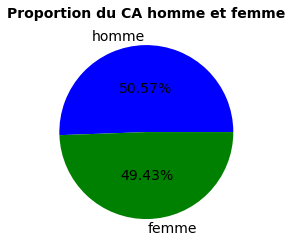

In [42]:
# Visualization la proportion par piechart
portion = [homme_prop_ca,femme_prop_ca] 
plt.pie(portion,labels=["homme", "femme"],colors = ["blue","green"],autopct="%.2f%%",pctdistance=0.5,textprops={'fontsize': 14})
plt.title("Proportion du CA homme et femme", fontsize = 14, fontweight="bold")
plt.show()

#Sauvegarde en PNG
fig.savefig("graph_proportion du CA H-F.png")
plt.close(fig)

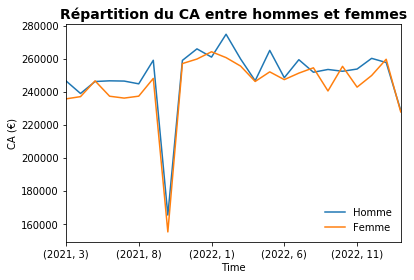

In [43]:
# Visualization CA par genre
homme.groupby(["year","month"])["price"].sum().plot()
femme.groupby(["year","month"])["price"].sum().plot()
plt.xlabel("Time")
plt.ylabel("CA (€)")
plt.legend(["Homme","Femme"], frameon=False, loc = "lower right")
plt.title("Répartition du CA entre hommes et femmes", fontsize = 14, fontweight = "bold")
plt.show()

#Sauvegarde en PNG
fig.savefig("graph_repartition du CA H-F.png")
plt.close(fig)

#### 3.6.3. Création d'une courbe de Lorenz des clients par age

In [44]:
cum = df.age.cumsum()

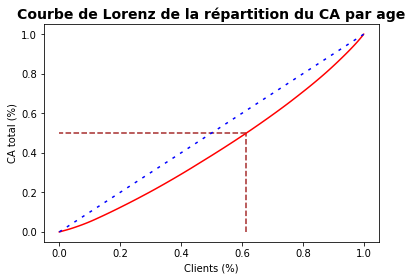

In [45]:
dep = df["age"]
n = len(cum)
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
# La courbe de Lorenz commence à 0
lorenz = np.append([0],lorenz) 

# Calcul de l'intersection
medial = lorenz[(lorenz < 0.5)].size / lorenz.size 

plt.plot(np.linspace(0,1,len(lorenz)), lorenz, drawstyle="steps-post", color="red", label="Lorenz")
plt.plot(np.linspace(0,1,len(lorenz)), np.linspace(0,1,len(lorenz)), dashes=[2,4], color="blue")

plt.vlines(medial, ymin=0, ymax=.5, color="brown", linestyle="--", linewidth=1.5, label="Medial")
plt.hlines(xmin=medial, xmax=0, y=.5, color="brown", linestyle="--", linewidth=1.5)
plt.title("Courbe de Lorenz de la répartition du CA par age", fontsize = 14, fontweight="bold")
plt.xlabel("Clients (%)")
plt.ylabel("CA total (%)")
plt.show()

#Sauvegarde en PNG
fig.savefig("graph_coubre de Lorenz CA par age.png")
plt.close(fig)

**On peut voir une répartition quasiment égalitaire des clients par âge!**

In [46]:
# CA par age-ranges
df_age = df.groupby("age_ranges").agg({"client_id":"count", "price" : "sum"})

In [47]:
df_age = df_age.reset_index()
df_age_client = df_age[["age_ranges","client_id"]]

In [48]:
df_age_client

,age_ranges,client_id
0,19-29,69488
1,30-40,185997
2,41-51,243571
3,52-61,96247
4,62-73,55915
5,74-84,22051
6,85-94,6063


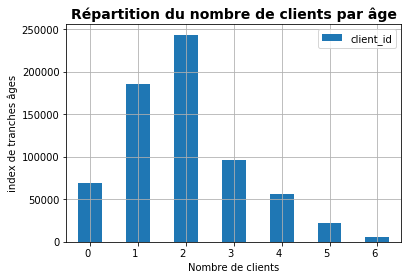

In [49]:
# Visualization
df_age_client.plot(kind="bar",)
plt.xticks(rotation =0,ha="right")
plt.xlabel("Nombre de clients")
plt.ylabel("index de tranches âges")
plt.title("Répartition du nombre de clients par âge", fontsize=14, fontweight="bold")
plt.grid()
plt.show()

#Sauvegarde en PNG
fig.savefig("graph_repartition du nombre de clients par age.png")
plt.close(fig)

In [50]:
# CA par age_ranges
df_age_CA = df_age[["age_ranges","price"]]

In [51]:
df_age_CA = df_age.groupby("age_ranges").agg({"price" : "sum"})

In [52]:
df_age_CA

,price
age_ranges,
19-29,2.884717e+06
30-40,2.732845e+06
41-51,3.215976e+06
52-61,1.614295e+06
62-73,9.390230e+05
74-84,3.670488e+05
85-94,1.021749e+05


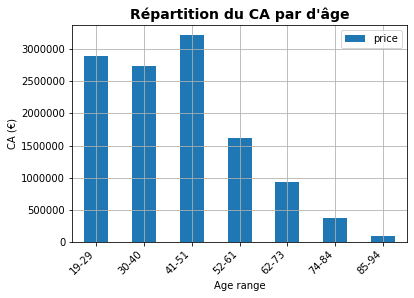

In [53]:
# Visualization
df_age_CA.plot(kind="bar",)
plt.xticks(rotation =45,ha="right")
plt.xlabel("Age range")
plt.ylabel("CA (€)")
plt.title("Répartition du CA par d\'âge", fontsize=14, fontweight="bold")
plt.grid()
plt.show()

#Sauvegarde en PNG
fig.savefig("graph_repartition du CA par d'age.png")
plt.close(fig)

In [54]:
# Par sex et par categ
homme_categ = pd.pivot_table(homme, index = ["year","month"], columns = "categ", values = "price",aggfunc={"price":"sum"});
femme_categ = pd.pivot_table(femme, index = ["year","month"], columns = "categ", values = "price",aggfunc={"price":"sum"});

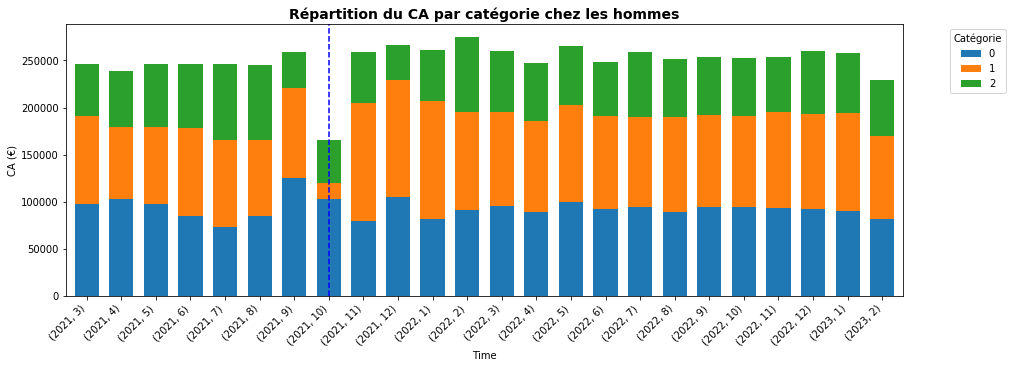

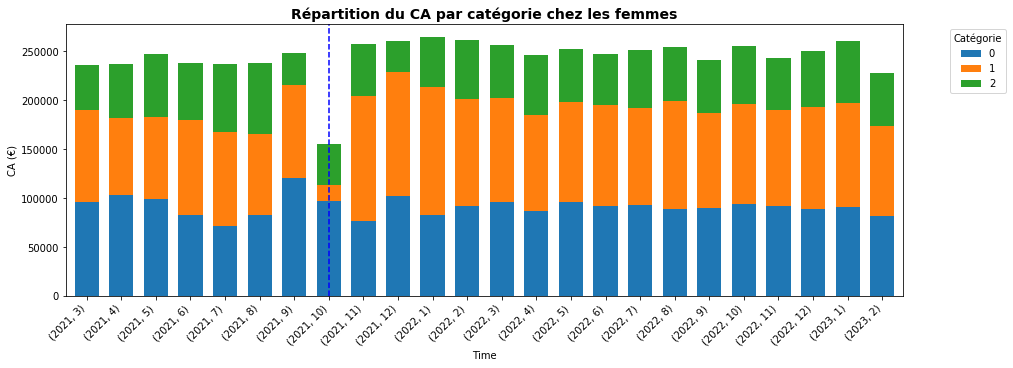

In [55]:
# Visualization de la répartition semblable du CA par catégorie de produits entre les hommes et les femmes.
homme_categ.plot(kind="bar",stacked = True,figsize=(15,5),width = 0.7)
plt.xlabel("Time")
plt.ylabel("CA (€)")
plt.title("Répartition du CA par catégorie chez les hommes", fontsize = 14, fontweight = "bold")
plt.axvline(7,color="blue",linestyle= "--")
plt.xticks(rotation = 45,ha="right")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", title = "Catégorie")
plt.show()
femme_categ.plot(kind='bar',stacked = True,figsize=(15,5),width = 0.7)
plt.xlabel("Time")
plt.ylabel("CA (€)")
plt.title("Répartition du CA par catégorie chez les femmes", fontsize = 14, fontweight = "bold")
plt.axvline(7,color="blue",linestyle= "--")
plt.xticks(rotation = 45,ha="right")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc="upper left", title = "Catégorie")
plt.show()

#Sauvegarde en PNG
fig.savefig("graph_repartition du CA par categorie.png")
plt.close(fig)

### 3.7. Etude CA sur les produits

In [56]:
# On affiche les nombre d'articles
df.id_prod.count()

679332

In [57]:
# Par categ
df.groupby("categ").id_prod.count()

categ
0    415680
1    227169
2     36483
Name: id_prod, dtype: int64

**On peut concludre qu'il n'y a pas la même quantité de produits par catégorie.**

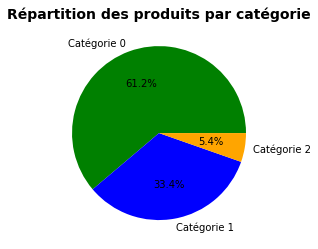

In [58]:
# Visualization la répartition des produits par catégories
plt.pie(df.groupby("categ").id_prod.count(),labels=["Catégorie 0", "Catégorie 1", "Catégorie 2"],colors = ["green","blue","orange"], autopct='%1.1f%%')
plt.title("Répartition des produits par catégorie", fontsize = 14, fontweight="bold")
plt.show()

#Sauvegarde en PNG
fig.savefig("Repartitions_des_produits_par_categorie.png")
plt.close(fig)

#### 3.7.1. Top et flop par réference de produit

In [59]:
df.columns

Index(['id_prod', 'date', 'session_id', 'client_id', 'sex', 'birth', 'price',
       'categ', 'year', 'month', 'day', 'age', 'age_ranges'],
      dtype='object')

In [60]:
# ventes par reference de produit (id_prod)
CA_ref = df.groupby('id_prod')['price'].agg(['sum','count'])
CA_ref.reset_index(inplace=True)
CA_ref.sort_values(by='sum',ascending = False)


,id_prod,sum,count
3097,2_159,94893.50,650
3071,2_135,69334.95,1005
3046,2_112,65407.76,968
3035,2_102,60736.78,1027
3153,2_209,56971.86,814
...,...,...,...
665,0_1601,1.99,1
2080,0_807,1.99,1
719,0_1653,1.98,2
313,0_1284,1.38,1


In [61]:
#recherche des ref qui se sont vendues a moins de 5 exemplaires sur la periode.il y a 158 references qui se sont vendues a 4 exemplaires ou moins. 
CA_ref.loc[CA_ref['count']<5]

,id_prod,sum,count
3,0_100,61.80,3
17,0_1012,97.20,3
41,0_1037,62.97,3
62,0_1056,9.84,4
78,0_1071,91.96,4
...,...,...,...
3248,2_81,86.99,1
3254,2_89,431.96,4
3259,2_93,157.98,2
3261,2_95,395.96,4


In [62]:
# afficher les 20 ref ayant realise le CA le moins eleve
CA_ref.sort_values(by='sum').head(20)

,id_prod,sum,count
595,0_1539,0.99,1
313,0_1284,1.38,1
719,0_1653,1.98,2
1785,0_541,1.99,1
2080,0_807,1.99,1
665,0_1601,1.99,1
802,0_1728,2.27,1
549,0_1498,2.48,1
2180,0_898,2.54,2
925,0_1840,2.56,2


In [63]:
# afficher les 20 references qui se sont le mieux vendues, par nombre de ventes. 
CA_ref.sort_values(by='count', ascending = False).head(20)

,id_prod,sum,count
2592,1_369,54025.48,2252
2645,1_417,45947.11,2189
2642,1_414,51949.40,2180
2734,1_498,49731.36,2128
2654,1_425,35611.04,2096
2630,1_403,35260.40,1960
2640,1_412,32484.15,1951
2641,1_413,34990.55,1945
2633,1_406,48106.59,1939
2634,1_407,30940.65,1935


In [64]:
CA_ref.sort_values(by='count', ascending = True).head(20)

,id_prod,sum,count
1793,0_549,2.99,1
1327,0_2201,20.99,1
3176,2_23,115.99,1
313,0_1284,1.38,1
752,0_1683,2.99,1
2109,0_833,2.99,1
3264,2_98,149.74,1
698,0_1633,24.99,1
665,0_1601,1.99,1
3248,2_81,86.99,1


#### 3.7.2. Panier moyen

In [65]:
# Calculate le panier moyen
panier_moyen = df.groupby(["session_id"])["price"].sum().mean()
print(panier_moyen)

34.635000277587196


In [66]:
# Création du dataframe par session (commande) pour calculer le panier moyen
df_sessions = df.groupby(["session_id", "client_id", "sex", "birth", "age","age_ranges","month","year"]).sum().reset_index()
df_sessions = df_sessions[["session_id","client_id","sex","birth","age","age_ranges","month","year","price"]].sort_values(["year", "month"])

In [67]:
df_sessions

,session_id,client_id,sex,birth,age,age_ranges,month,year,price
0,s_1,c_329,f,1967,56,52-61,3,2021,11.99
1,s_10,c_2218,f,1970,53,52-61,3,2021,26.99
2,s_100,c_3854,f,1978,45,41-51,3,2021,33.72
3,s_1000,c_1014,m,1989,34,30-40,3,2021,39.22
4,s_10000,c_476,f,1989,34,30-40,3,2021,41.49
...,...,...,...,...,...,...,...,...,...
270283,s_348443,c_4999,f,1972,51,41-51,2,2023,28.54
270284,s_348444,c_3573,f,1996,27,19-29,2,2023,21.92
270285,s_348445,c_50,f,1994,29,19-29,2,2023,48.99
270286,s_348446,c_488,f,1985,38,30-40,2,2023,26.99


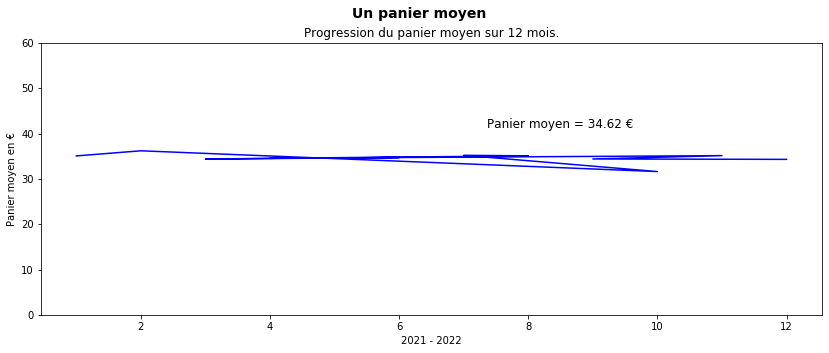

In [68]:
df_sessions_mensuel = df_sessions.groupby("month").mean().reset_index().sort_values(["year", "month"])

fig=plt.figure(figsize=(14,5))
ax = plt.axes()
# Titres des axes
ax = ax.set(xlabel="2021 - 2022", ylabel="Panier moyen en €")

plt.plot(df_sessions_mensuel['month'], df_sessions_mensuel['price'], color="blue")
plt.text(8.5,42,('Panier moyen = '+ str(round(df_sessions_mensuel['price'].mean(),2)) + ' €'),horizontalalignment='center',
     verticalalignment='center', fontsize=12)
plt.yticks(np.arange(start=0, stop=70, step=10))
plt.suptitle('Un panier moyen', 
  fontweight='bold', 
  fontsize=14)
plt.title('Progression du panier moyen sur 12 mois.', 
  loc='center', 
  fontsize=12)
plt.show()

#Sauvegarde en PNG
fig.savefig("graph_panier_moyen_mensuel.png")
plt.close(fig)

#### 3.7.3. Top et flop par session_id

In [69]:
# On affiche du nombre de sessions
df.session_id.value_counts().shape

(342315,)

In [70]:
# On affiche la statistique descriptive
df.session_id.describe(include = "all")

count       679332
unique      342315
top       s_118668
freq            14
Name: session_id, dtype: object

In [71]:
# On affiche le nombre d'articles vendus et le CA généré
df_session = df.groupby(["session_id"]).agg({"price":["sum", "count"]});
# Les colonnes ()"price","sum") par ordre décroissant
df_session.sort_values(("price","sum"), ascending= False)

price      
               sum count
session_id              
s_95844     568.88     5
s_123227    539.23     3
s_335005    535.17     3
s_83158     535.17     3
s_150439    496.22     4
...            ...   ...
s_34456       0.62     1
s_107417      0.62     1
s_41352       0.62     1
s_104606      0.62     1
s_260416      0.62     1

[342315 rows x 2 columns]

In [72]:
df_session.sort_values(("price","sum"), ascending= True)

price      
               sum count
session_id              
s_260416      0.62     1
s_104606      0.62     1
s_41352       0.62     1
s_34456       0.62     1
s_107417      0.62     1
...            ...   ...
s_150439    496.22     4
s_335005    535.17     3
s_83158     535.17     3
s_123227    539.23     3
s_95844     568.88     5

[342315 rows x 2 columns]

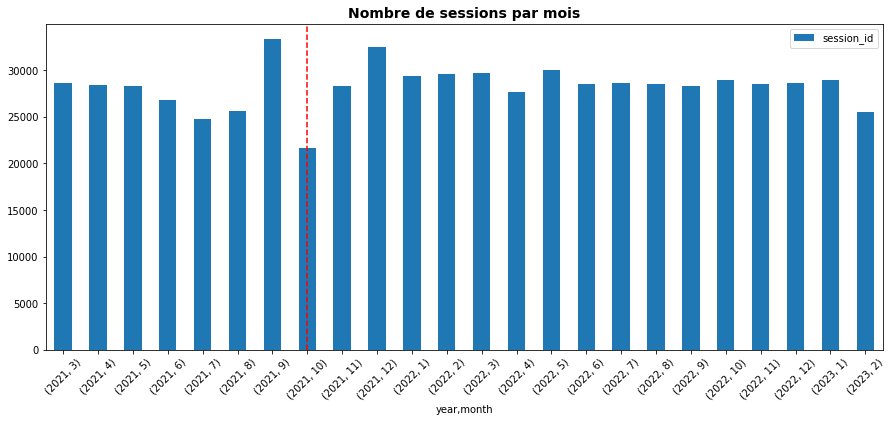

In [73]:
# Visualization le nombre de sessions
df.groupby(["year","month"]).agg({"session_id": "count"}).plot(kind="bar",figsize=(15,6))
plt.xticks(rotation=45)
plt.title("Nombre de sessions par mois", fontsize = 14, fontweight = "bold")
plt.axvline(7,color="red",linestyle="--")
plt.show()

#Sauvegarde en PNG
fig.savefig("graph_nombre_de_sessions_par_mois.png")
plt.close(fig)